<a href="https://colab.research.google.com/github/Shreya21-2003/TB_Analysis/blob/main/Tracking%2C_predicting_and_treating_TB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TRANSFORMER- TRACKING

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snS

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!unzip "/content/tb (2).zip"

Archive:  /content/tb (2).zip
   creating: tb (75)/
  inflating: tb (75)/Tuberculosis_Dataset.csv  


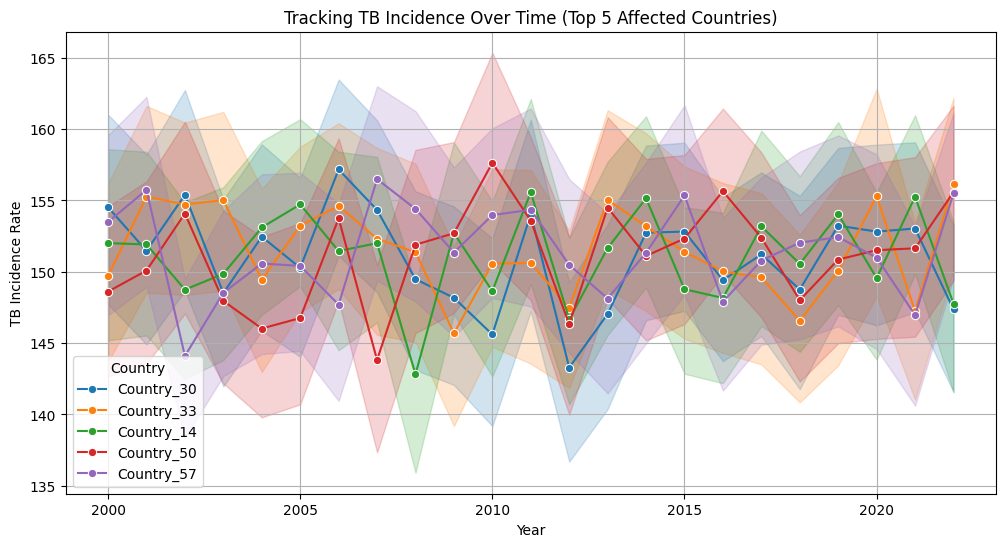

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # ✅ Import Seaborn

# Load dataset
df = pd.read_csv("/content/tb (75)/Tuberculosis_Dataset.csv")

# Select relevant columns for tracking
tracking_features = ['Year', 'Country', 'TB_Incidence_Rate']

# Filter data
df_tracking = df[tracking_features].dropna()

# Plot TB Incidence over time for top affected countries
top_countries = df_tracking.groupby('Country')['TB_Incidence_Rate'].mean().nlargest(5).index
df_top_countries = df_tracking[df_tracking['Country'].isin(top_countries)]

# Plot TB Incidence trends
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_top_countries, x="Year", y="TB_Incidence_Rate", hue="Country", marker="o")
plt.title("Tracking TB Incidence Over Time (Top 5 Affected Countries)")
plt.xlabel("Year")
plt.ylabel("TB Incidence Rate")
plt.legend(title="Country")
plt.grid(True)
plt.show()


TRANSFORMER- PREDICTION

In [ ]:
# 🔹 Separate scalers for features (X) and target (y)
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Fit & transform feature data (X) and target data (y)
X_scaled = scaler_X.fit_transform(df[features])
y_scaled = scaler_y.fit_transform(df[[target]])

# Split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Reshape for Transformer (batch, time steps, features)
X_train = np.expand_dims(X_train, axis=1)
X_test = np.expand_dims(X_test, axis=1)

# 🔹 Build Transformer Model
input_layer = Input(shape=(1, X_train.shape[-1]))
x = transformer_encoder(input_layer, head_size=64, num_heads=4, ff_dim=128, dropout=0.1)
x = GlobalAveragePooling1D()(x)
x = Dense(64, activation="relu")(x)
x = Dropout(0.1)(x)
output_layer = Dense(1, activation="linear")(x)

# Compile Model
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss="mse")

# 🔹 Train Model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=16, verbose=1)

# 🔹 Predict on test data
y_pred = model.predict(X_test).flatten()

# Convert back to original scale using `scaler_y`
y_pred_rescaled = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_test_rescaled = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

# 🔹 Evaluate Model
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
r2 = r2_score(y_test_rescaled, y_pred_rescaled)

print(f"🔹 Mean Absolute Error (MAE): {mae:.4f}")
print(f"🔹 Mean Squared Error (MSE): {mse:.4f}")
print(f"🔹 R² Score: {r2:.4f}")


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis 3 of a tensor of shape (16, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


20000/20000 ━━━━━━━━━━━━━━━━━━━━ 76s 3ms/step - loss: 0.0200 - val_loss: 0.0170
Epoch 2/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 66s 3ms/step - loss: 0.0172 - val_loss: 0.0170
Epoch 3/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 80s 3ms/step - loss: 0.0172 - val_loss: 0.0170
Epoch 4/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 92s 4ms/step - loss: 0.0171 - val_loss: 0.0170
Epoch 5/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 84s 4ms/step - loss: 0.0171 - val_loss: 0.0170
Epoch 6/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 71s 3ms/step - loss: 0.0171 - val_loss: 0.0170
Epoch 7/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 75s 4ms/step - loss: 0.0171 - val_loss: 0.0170
Epoch 8/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 72s 3ms/step - loss: 0.0171 - val_loss: 0.0170
Epoch 9/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 82s 3ms/step - loss: 0.0171 - val_loss: 0.0170
Epoch 10/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 81s 3ms/step - loss: 0.0172 - val_loss: 0.0170


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis 3 of a tensor of shape (32, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
🔹 Mean Absolute Error (MAE): 39.8397
🔹 Mean Squared Error (MSE): 2490.9438
🔹 R² Score: -0.0000


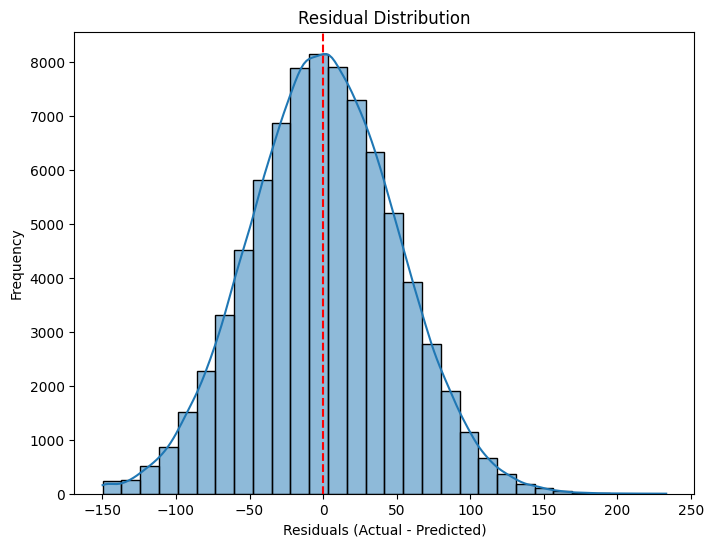

In [ ]:
residuals = y_test_rescaled - y_pred_rescaled

plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(0, color='red', linestyle='dashed')
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()


TREATMENT

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LayerNormalization, MultiHeadAttention, Dropout, Add, GlobalAveragePooling1D
from tensorflow.keras.models import Model
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("/content/tb (75)/Tuberculosis_Dataset.csv")  # Update with actual path

# Select features and target
features = ['Year', 'TB_Incidence_Rate', 'Population', 'HIV_Prevalence', 'Mortality_Rate',
            'Urban_Population_Percentage', 'Smoking_Rate', 'Alcohol_Consumption',
            'Healthcare_Expenditure_Per_Capita', 'Primary_Healthcare_Access', 'Age_Group',
            'HIV_CoInfection_Rate', 'BCG_Vaccination_Coverage', 'Multidrug_Resistance_Rate',
            'Unemployment_Rate', 'GDP_Per_Capita', 'Life_Expectancy', 'TB_Screening_Coverage',
            'Rural_Population_Percentage', 'Gender', 'Country']

target = 'Treatment_Success_Rate'  # Target variable

# Drop missing values
df = df[features + [target]].dropna()

# Encode categorical features
label_encoders = {}
for col in ['Age_Group', 'Gender', 'Country']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])  # Convert to numbers
    label_encoders[col] = le

# Normalize features and target separately
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

df_scaled_X = pd.DataFrame(scaler_X.fit_transform(df[features]), columns=features)
df_scaled_y = scaler_y.fit_transform(df[[target]])  # Keep it as 2D

# Split into features (X) and target (y)
X = df_scaled_X
y = df_scaled_y.flatten()  # Flatten to 1D array for ML models

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape for Transformer (batch, time steps, features)
X_train = np.expand_dims(X_train, axis=1)
X_test = np.expand_dims(X_test, axis=1)

# Define Transformer Block
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0.1):
    x = LayerNormalization(epsilon=1e-6)(inputs)
    x = MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(x, x)
    x = Dropout(dropout)(x)
    res = Add()([x, inputs])

    x = LayerNormalization(epsilon=1e-6)(res)
    x = Dense(ff_dim, activation="relu")(x)
    x = Dropout(dropout)(x)
    x = Dense(inputs.shape[-1])(x)
    x = Add()([x, res])
    return x

# Build Transformer Model
input_layer = Input(shape=(1, X_train.shape[-1]))
x = transformer_encoder(input_layer, head_size=64, num_heads=4, ff_dim=128, dropout=0.1)
x = GlobalAveragePooling1D()(x)
x = Dense(64, activation="relu")(x)
x = Dropout(0.1)(x)
output_layer = Dense(1, activation="linear")(x)  # Linear for regression

# Compile Model
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="mse")

# Train Model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=16, verbose=1)

# Predict on test data
y_pred = model.predict(X_test).flatten()

# Convert back to original scale (Only for Target)
y_pred_rescaled = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_test_rescaled = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

# Evaluate Model
mae = mean_absolute_error(y_test_rescaled, y_pred_rescaled)
mse = mean_squared_error(y_test_rescaled, y_pred_rescaled)
r2 = r2_score(y_test_rescaled, y_pred_rescaled)

print(f"🔹 Mean Absolute Error (MAE): {mae:.4f}")
print(f"🔹 Mean Squared Error (MSE): {mse:.4f}")
print(f"🔹 R² Score: {r2:.4f}")


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis 3 of a tensor of shape (16, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


20000/20000 ━━━━━━━━━━━━━━━━━━━━ 75s 3ms/step - loss: 0.0896 - val_loss: 0.0833
Epoch 2/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 79s 3ms/step - loss: 0.0836 - val_loss: 0.0833
Epoch 3/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 81s 3ms/step - loss: 0.0833 - val_loss: 0.0833
Epoch 4/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 82s 3ms/step - loss: 0.0834 - val_loss: 0.0834
Epoch 5/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 82s 3ms/step - loss: 0.0834 - val_loss: 0.0834
Epoch 6/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 84s 3ms/step - loss: 0.0834 - val_loss: 0.0833
Epoch 7/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 77s 4ms/step - loss: 0.0834 - val_loss: 0.0833
Epoch 8/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 82s 4ms/step - loss: 0.0832 - val_loss: 0.0833
Epoch 9/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 66s 3ms/step - loss: 0.0833 - val_loss: 0.0833
Epoch 10/10
20000/20000 ━━━━━━━━━━━━━━━━━━━━ 78s 4ms/step - loss: 0.0834 - val_loss: 0.0833


/usr/local/lib/python3.11/dist-packages/keras/src/ops/nn.py:907: UserWarning: You are using a softmax over axis 3 of a tensor of shape (32, 4, 1, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


2500/2500 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
🔹 Mean Absolute Error (MAE): 10.0057
🔹 Mean Squared Error (MSE): 133.3383
🔹 R² Score: -0.0005


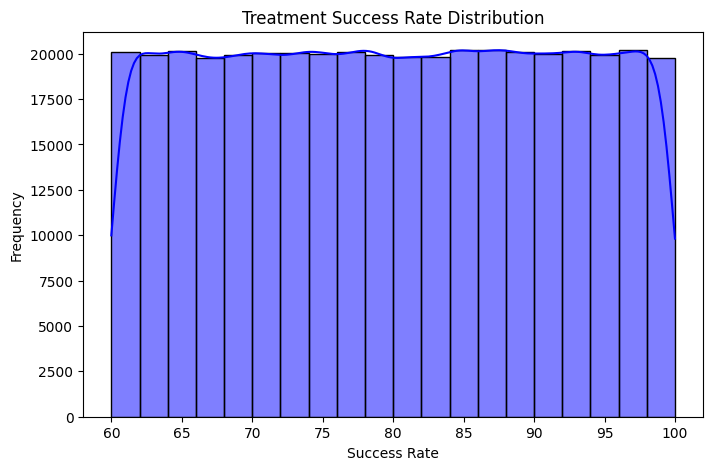

<ipython-input-26-772afc01b299>:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x="Year", y="Treatment_Success_Rate", estimator='mean', ci=None, marker='o')


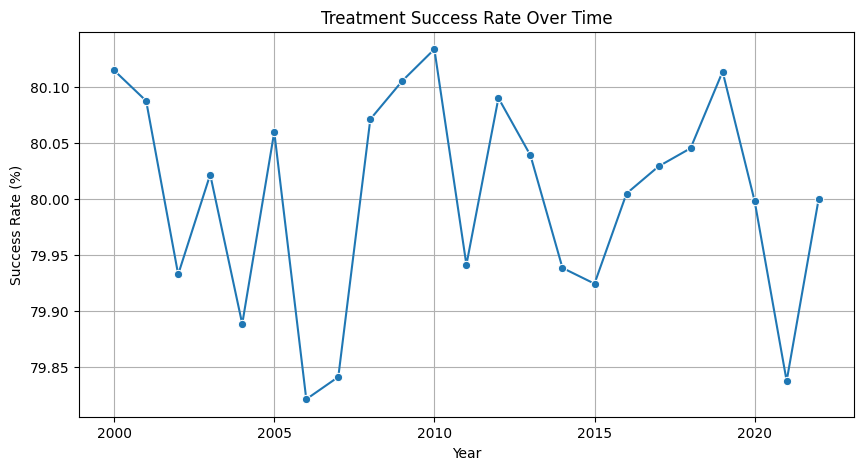

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap

# Load dataset (Modify the filename accordingly)
df = pd.read_csv("/content/tb (75)/Tuberculosis_Dataset.csv")

# 🔹 1. Histogram: Treatment Success Rate Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Treatment_Success_Rate'], bins=20, kde=True, color='blue')
plt.title("Treatment Success Rate Distribution")
plt.xlabel("Success Rate")
plt.ylabel("Frequency")
plt.show()

# 🔹 2. Line Plot: Treatment Success Rate Over Time
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x="Year", y="Treatment_Success_Rate", estimator='mean', ci=None, marker='o')
plt.title("Treatment Success Rate Over Time")
plt.xlabel("Year")
plt.ylabel("Success Rate (%)")
plt.grid(True)
plt.show()




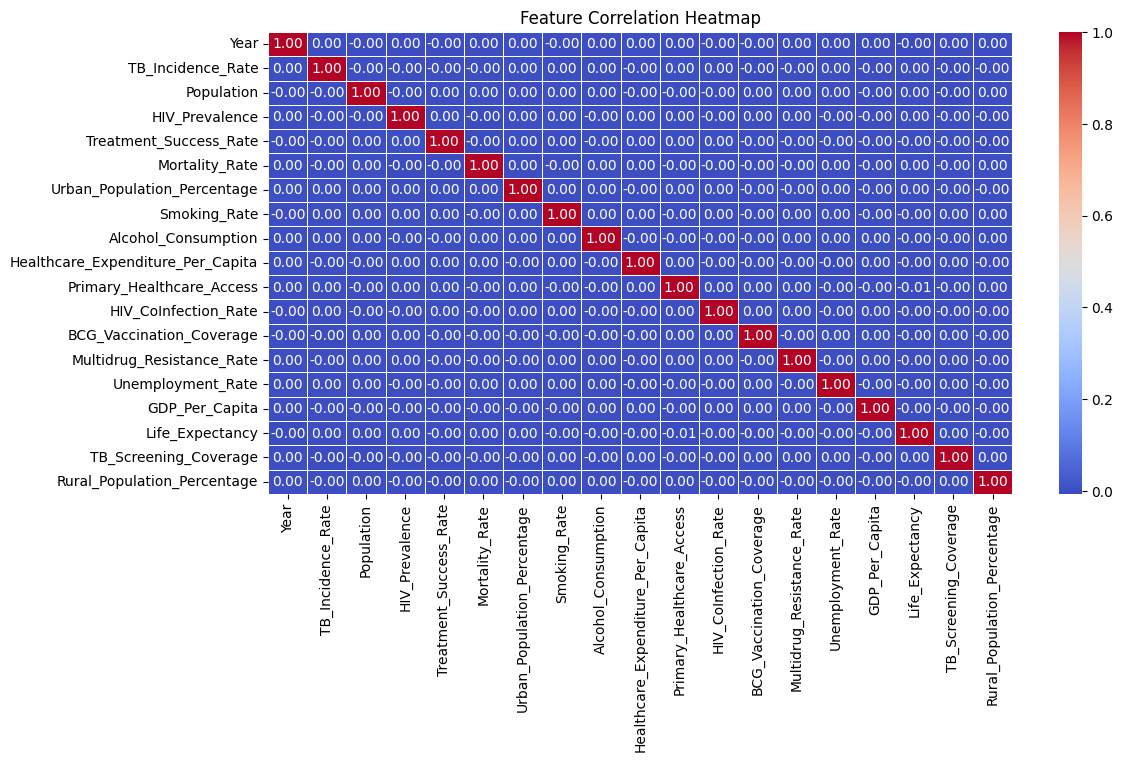

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Drop non-numeric columns
df_numeric = df.select_dtypes(include=['number'])

# Compute correlation
plt.figure(figsize=(12, 6))
corr = df_numeric.corr()

# Plot heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()
